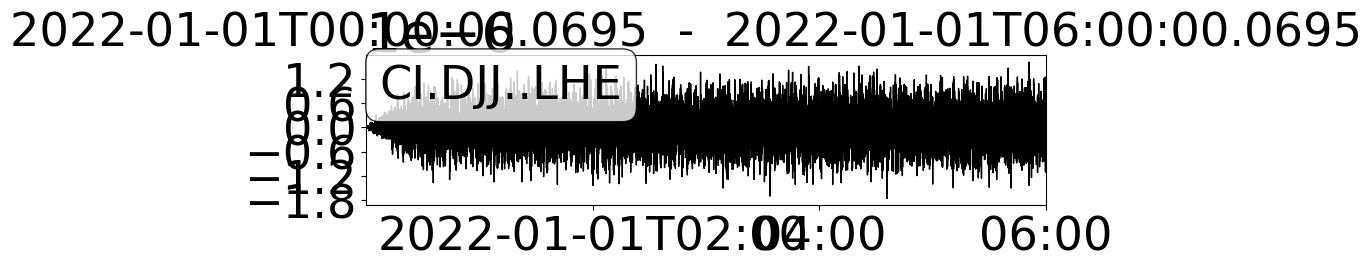

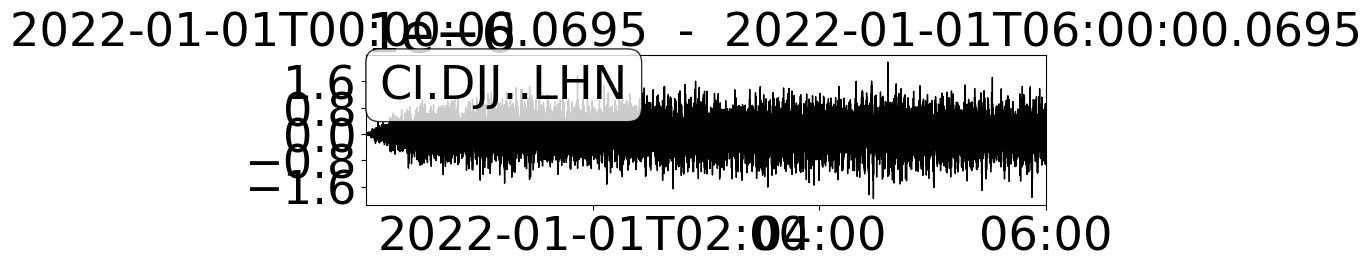

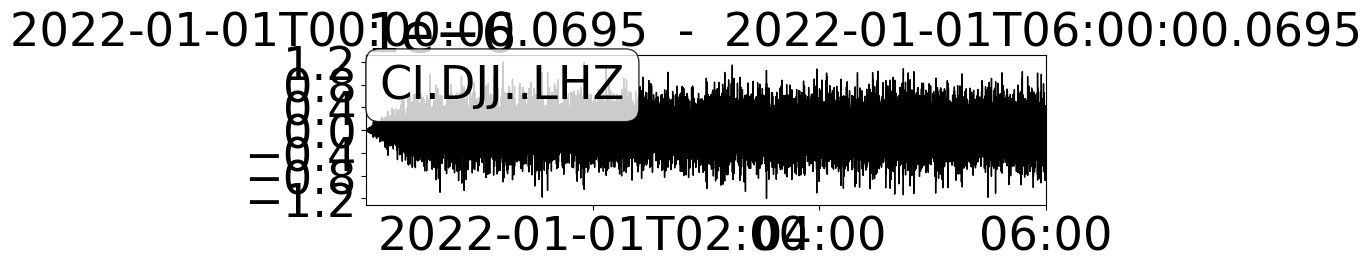

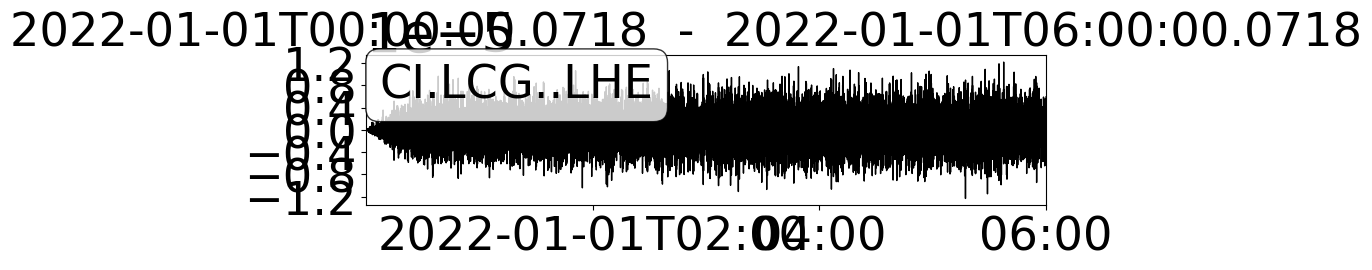

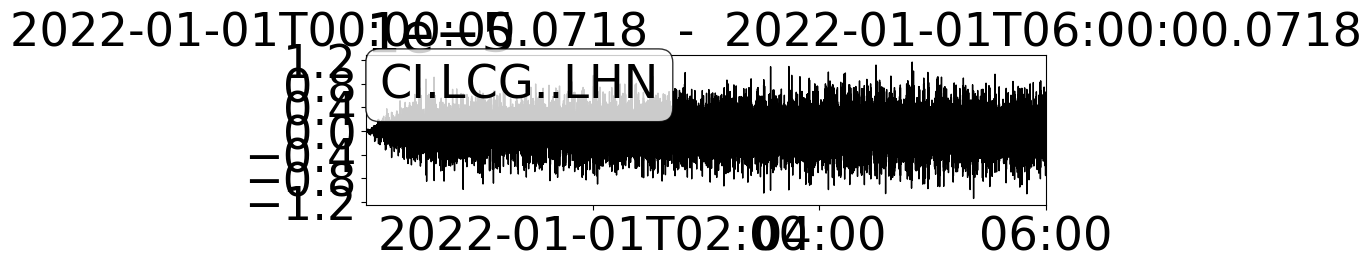

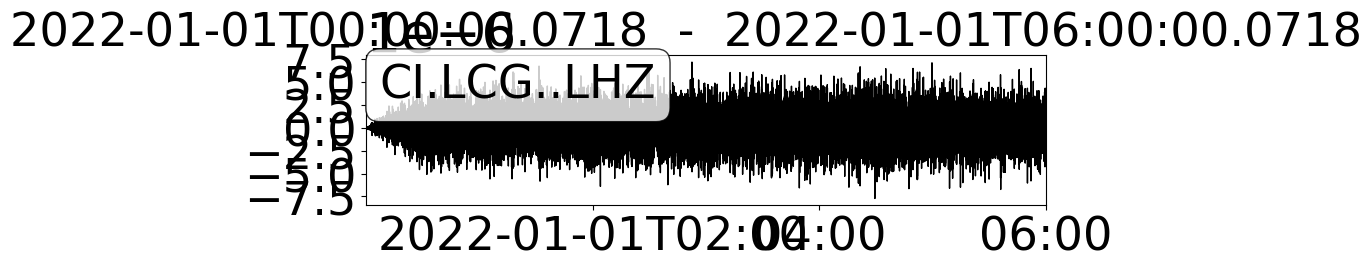

[-1.15624209e-02 -8.08974948e-03 -1.20312542e-03 ... -3.27954040e-05
  1.50122822e-04 -2.63295269e-05]
[ 0.01192456 -0.01190584  0.00043196 ... -0.00015112 -0.0001325
  0.00023276]
[-4.45730799e-03 -9.29651857e-05  1.41301296e-03 ...  8.59592390e-06
 -4.89993454e-05 -9.70426425e-06]
21588
0.07736445510462069
-11
21596
0.055344457101851735
-3
21609
0.06266588819022524
10


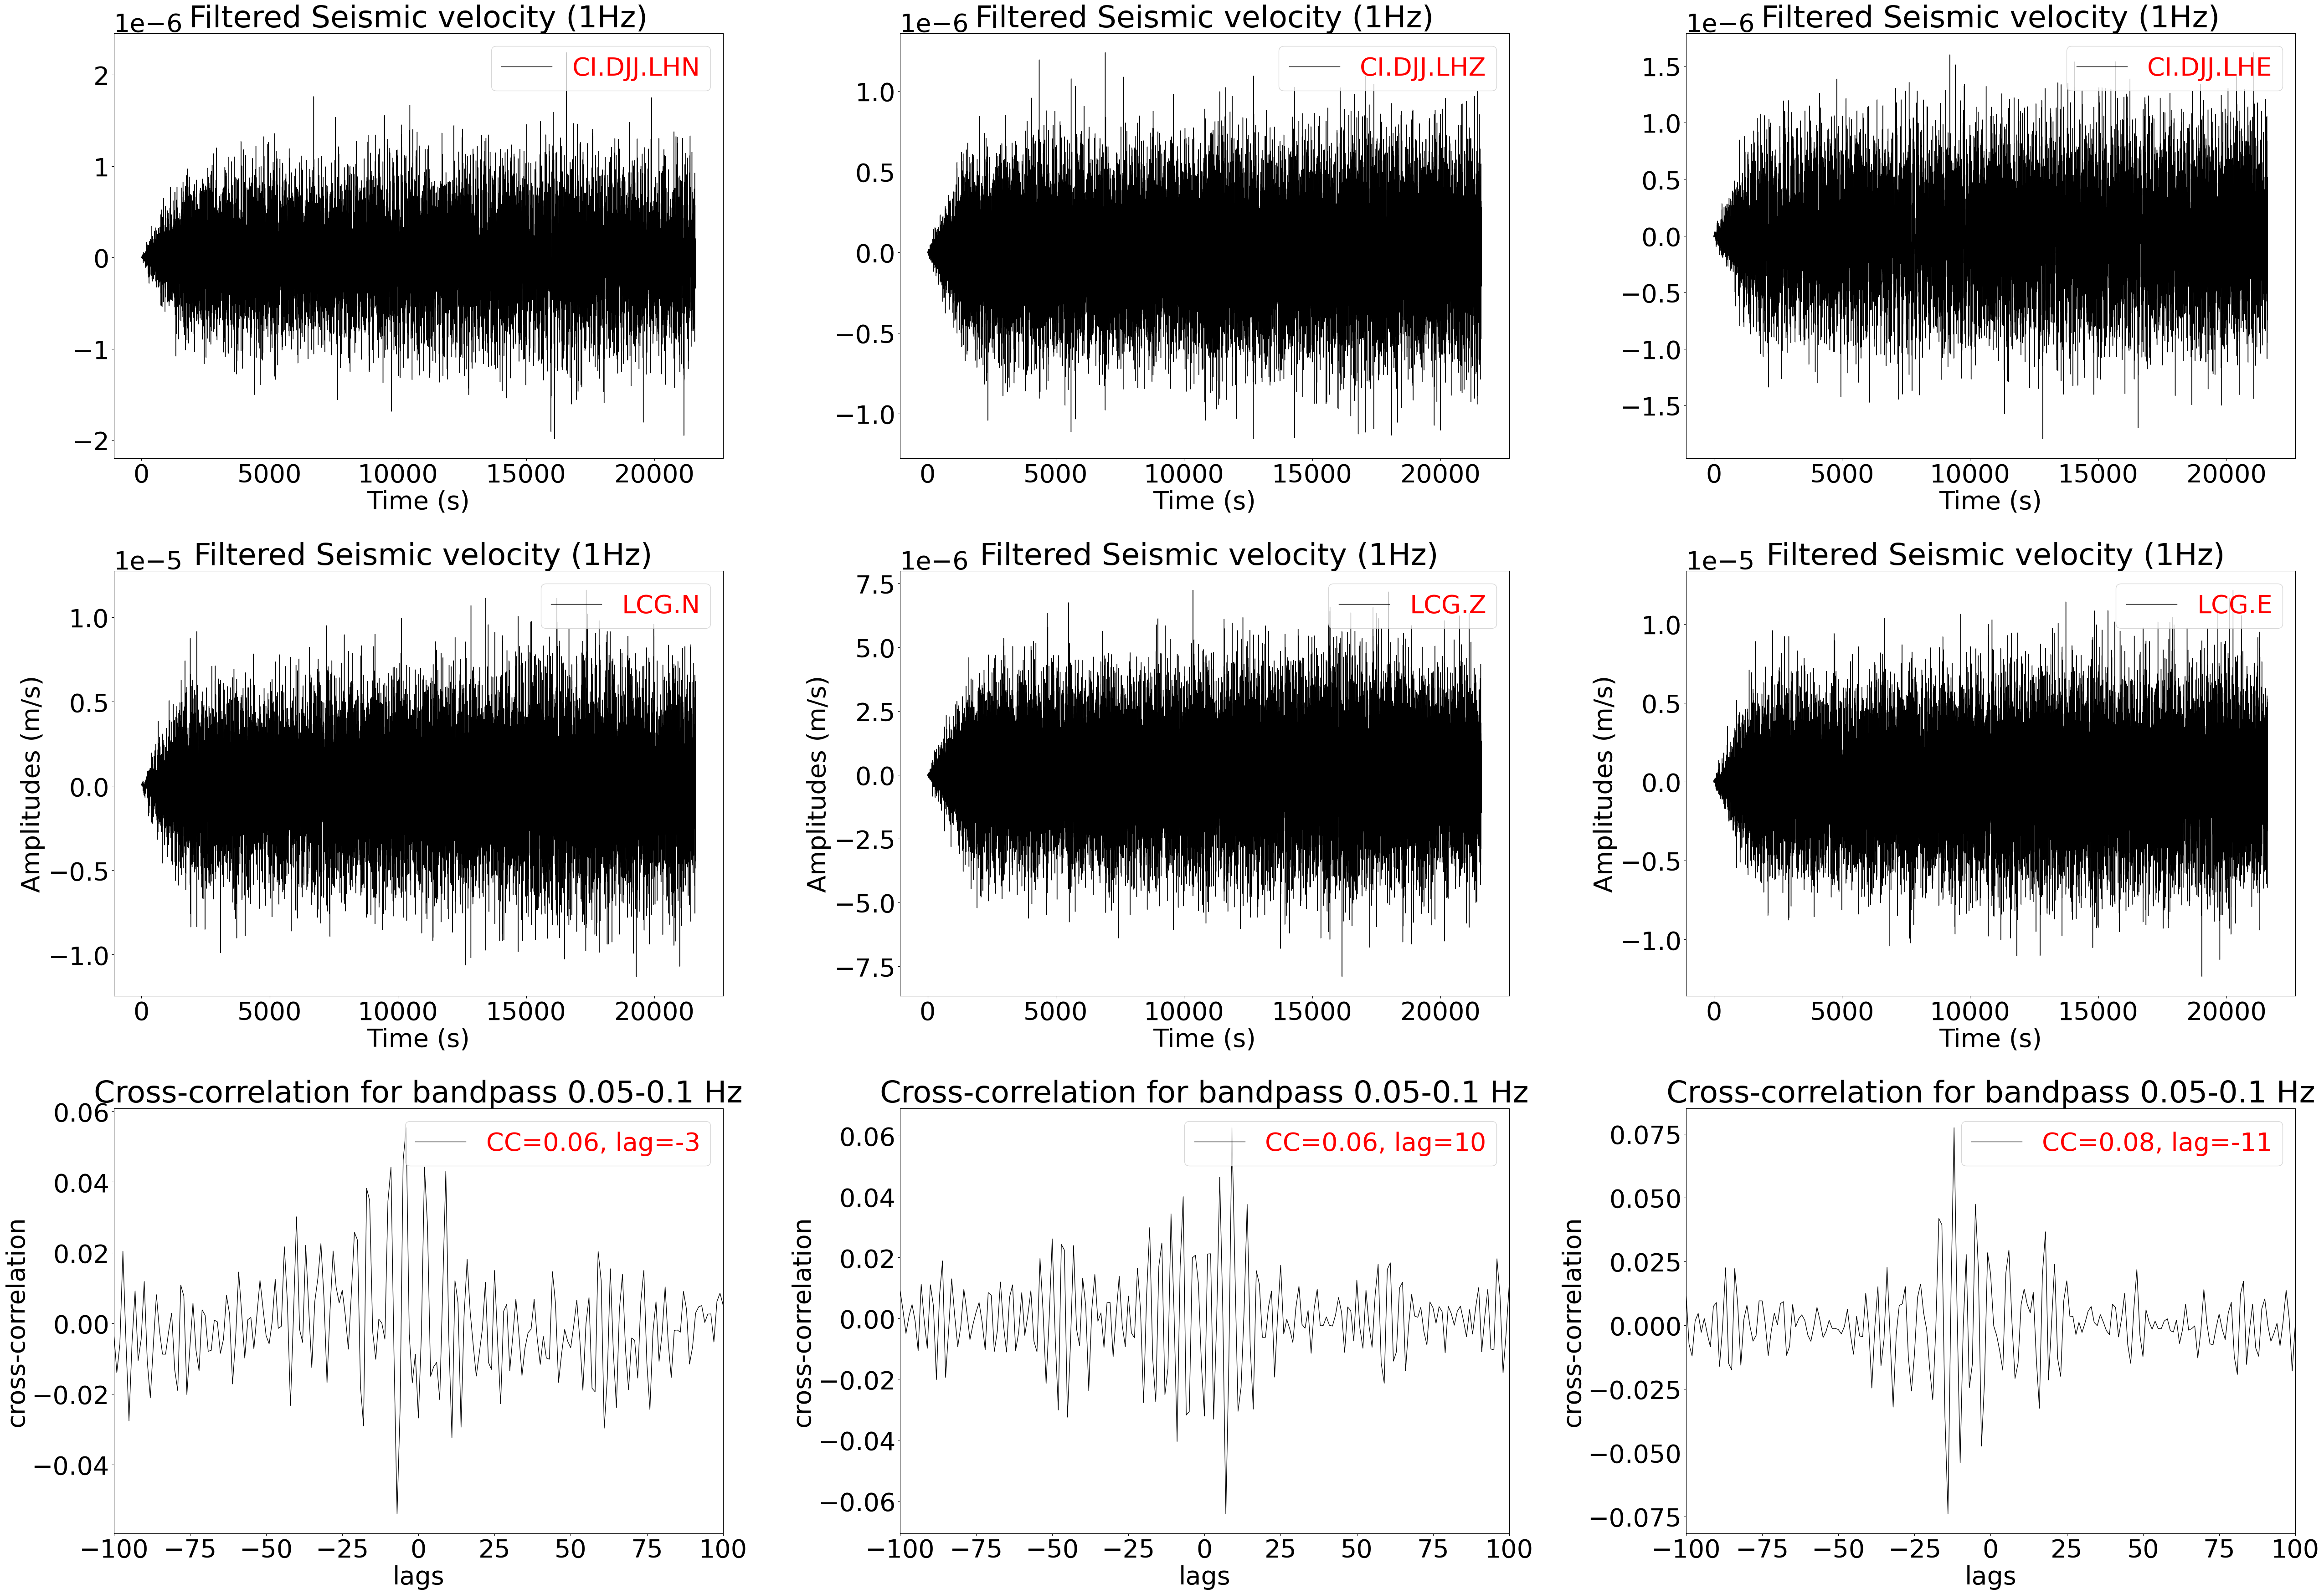

In [14]:
######## seismic - seismic cross correlataion ##################

from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate, correlate_template, xcorr_max

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime


def compute_shifte(cce):
    zero_index = int(len(cce) / 2) - 1
    shifte =  index_e - zero_index 
    return shifte

def compute_shiftn(ccn):
    zero_index = int(len(ccn) / 2) - 1
    shiftn =  index_n - zero_index 
    return shiftn

def compute_shiftz(ccz):
    zero_index = int(len(ccz) / 2) - 1
    shiftz =  index_z - zero_index 
    return shiftz

# LOAD SEISMIC VELOCITY E DATA
st_s_ve = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/DJJ/LHE/CI.DJJ..LHE.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_s_ve[0].trim(dt+0, dt+21600)
st_s_ve[0].plot()

# LOAD SEISMIC VELOCITY N DATA
st_s_vn = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/DJJ/LHN/CI.DJJ..LHN.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_s_vn[0].trim(dt+0, dt+21600)
st_s_vn[0].plot()

# LOAD SEISMIC VELOCITY Z DATA
st_s_vz = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/DJJ/LHZ/CI.DJJ..LHZ.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_s_vz[0].trim(dt+0, dt+21600)
st_s_vz[0].plot()

# TIDY UP VELOCITY TRACE
st_s_ve[0].detrend('linear')
st_s_ve[0].detrend('demean')
#st_seis_ve[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_s_vn[0].detrend('linear')
st_s_vn[0].detrend('demean')
#st_seis_vn[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_s_vz[0].detrend('linear')
st_s_vz[0].detrend('demean')

st_sm_fe = st_s_ve[0].copy()
st_sm_fe.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)

st_sm_fn = st_s_vn[0].copy()
st_sm_fn.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)

st_sm_fz = st_s_vz[0].copy()
st_sm_fz.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)


# LOAD SEISMIC VELOCITY E DATA
st_seis_ve = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LCG/LHE/CI.LCG..LHE.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_ve[0].trim(dt+0, dt+21600)
st_seis_ve[0].plot()

# LOAD SEISMIC VELOCITY N DATA
st_seis_vn = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LCG/LHN/CI.LCG..LHN.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vn[0].trim(dt+0, dt+21600)
st_seis_vn[0].plot()

# LOAD SEISMIC VELOCITY Z DATA
st_seis_vz = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LCG/LHZ/CI.LCG..LHZ.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vz[0].trim(dt+0, dt+21600)
st_seis_vz[0].plot()

# TIDY UP VELOCITY TRACE
st_seis_ve[0].detrend('linear')
st_seis_ve[0].detrend('demean')
#st_seis_ve[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vn[0].detrend('linear')
st_seis_vn[0].detrend('demean')
#st_seis_vn[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vz[0].detrend('linear')
st_seis_vz[0].detrend('demean')

st_sm1_fe = st_seis_ve[0].copy()
st_sm1_fe.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)

st_sm1_fn = st_seis_vn[0].copy()
st_sm1_fn.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)

st_sm1_fz = st_seis_vz[0].copy()
st_sm1_fz.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)

# NORMALIZE EACH TRACE WITH ITS ABSOLUTE MAXIMUM
#st_s_ve[0].normalize()
#st_sm_fe.normalize()
#st_seis_ve[0].normalize()
#st_sm1_fe.normalize()
#st_s_vn[0].normalize()
#st_sm_fn.normalize()
#st_seis_vn[0].normalize()
#st_sm1_fn.normalize()
#st_s_vz[0].normalize()
#st_sm_fz.normalize()
#st_seis_vz[0].normalize()
#st_sm1_fz.normalize()

# CROSS CORRELATION
lags = np.arange(-21600, 21601)  
cce = correlate_template(st_sm_fe.data, st_sm1_fe.data, mode='full')
print (cce)
index_e = np.argmax(cce)
ccn = correlate_template(st_sm_fn.data, st_sm1_fn.data, mode='full')
print (ccn)
index_n = np.argmax(ccn)
ccz = correlate_template(st_sm_fz.data, st_sm1_fz.data, mode='full')
print (ccz)
index_z = np.argmax(ccz)


print(index_e)
print(max(cce))
print(compute_shifte(cce))
print(index_n)
print(max(ccn))
print(compute_shiftn(ccn))
print(index_z)
print(max(ccz))
print(compute_shiftz(ccz))


# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,36]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(3,3)

ax[0,2].plot(st_sm_fe.times(), st_sm_fe.data, 'k-', linewidth=1, label=(st_s_ve[0].stats['network'])+'.'+(st_s_ve[0].stats['station'])+'.'+(st_s_ve[0].stats['channel']))
ax[0,2].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,2].set_xlabel('Time (s)')
ax[1,2].plot(st_sm1_fe.times(), st_sm1_fe.data, 'k-', linewidth=1, label=(st_seis_ve[0].stats['station'])+'.E')
ax[1,2].set_title(' Filtered Seismic velocity (1Hz)')
ax[1,2].set_ylabel('Amplitudes (m/s)')
ax[1,2].set_xlabel('Time (s)')
ax[2,2].plot(lags, cce, 'k', linewidth=1, label=('CC=%.2f' % max(cce) +', lag=%d' % compute_shifte(cce)))
ax[2,2].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,2].set_ylabel('cross-correlation')
ax[2,2].set_xlim(-100, 100)
ax[2,2].set_xlabel('lags')
plt.tight_layout()

ax[0,0].plot(st_sm_fn.times(), st_sm_fn.data, 'k-', linewidth=1, label=(st_s_vn[0].stats['network'])+'.'+(st_s_vn[0].stats['station'])+'.'+(st_s_vn[0].stats['channel']))
ax[0,0].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,0].set_xlabel('Time (s)')
ax[1,0].plot(st_sm1_fn.times(), st_sm1_fn.data, 'k-', linewidth=1, label=(st_seis_vn[0].stats['station'])+'.N')
ax[1,0].set_title(' Filtered Seismic velocity (1Hz)')
ax[1,0].set_ylabel('Amplitudes (m/s)')
ax[1,0].set_xlabel('Time (s)')
ax[2,0].plot(lags, ccn, 'k', linewidth=1, label=('CC=%.2f' % max(ccn) +', lag=%d' % compute_shiftn(ccn))) 
ax[2,0].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,0].set_ylabel('cross-correlation')
ax[2,0].set_xlim(-100, 100)
ax[2,0].set_xlabel('lags')

ax[0,1].plot(st_sm_fz.times(), st_sm_fz.data, 'k-', linewidth=1, label=(st_s_vz[0].stats['network'])+'.'+(st_s_vz[0].stats['station'])+'.'+(st_s_vz[0].stats['channel']))
ax[0,1].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,1].set_xlabel('Time (s)')
ax[1,1].plot(st_sm1_fz.times(), st_sm1_fz.data, 'k-', linewidth=1, label=(st_seis_vz[0].stats['station'])+'.Z')
ax[1,1].set_title(' Filtered Seismic velocity (1Hz)')
ax[1,1].set_ylabel('Amplitudes (m/s)')
ax[1,1].set_xlabel('Time (s)')
ax[2,1].plot(lags, ccz, 'k', linewidth=1, label=('CC=%.2f' % max(ccz) +', lag=%d' % compute_shiftz(ccz)))
ax[2,1].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,1].set_ylabel('cross-correlation')
ax[2,1].set_xlim(-100, 100)
ax[2,1].set_xlabel('lags')
plt.tight_layout()


# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,1]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,2]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend

ll = ax[1,1].legend(loc=1)
plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("../MTP-VDJ-seismic_6hr.pdf")
fig.savefig("../MTP-VDJ-seismic_6hr.png")
